In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data/Social_media_performance.csv')
df

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral
0,1,LinkedIn,article,Technology,UR,BR,2025-04-25 09:47:00,#AI #Innovation #TechTrends #Programming #Codi...,0.76,37781,1202,462,185,0.0490,0
1,2,LinkedIn,poll,Health,FR,JP,2025-10-29 09:44:00,#Fitness #Nutrition #Wellness #Health #MentalH...,0.46,23541,1399,538,215,0.0915,1
2,3,LinkedIn,article,Travel,HI,FR,2025-02-10 14:12:00,#Travel #Journey #Adventure #Tourism #ExploreM...,-0.01,30714,1663,639,255,0.0833,1
3,4,LinkedIn,image,Sports,DE,DE,2025-04-18 22:41:00,#Cricket #Workout #Fitness,0.55,31294,1372,528,211,0.0675,0
4,5,LinkedIn,poll,Business,DE,US,2025-04-28 10:17:00,#Entrepreneur #Leadership #StartupLife,0.70,43129,2234,859,343,0.0797,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,YouTube,video,Food,PT,IN,2025-02-22 19:01:00,#Foodie #Cooking #Food #Recipe #FoodBlog #MustTry,-0.05,430376,39279,15107,6043,0.1404,1
9996,9997,YouTube,video,Technology,DE,US,2025-01-18 20:51:00,#Programming #DataScience #CodingLife #Innovat...,0.61,559223,12513,4812,1925,0.0344,0
9997,9998,YouTube,video,Entertainment,JA,IN,2025-08-12 20:58:00,#Funny #Viral #ShowBiz,0.78,833212,31796,12229,4891,0.0587,0
9998,9999,YouTube,video,Health,EN,DE,2025-04-27 19:04:00,#Wellness #Health #MentalHealth #Fitness #Nutr...,0.49,182707,15690,6034,2413,0.1321,1


In [3]:
df.shape

(10000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_id          10000 non-null  int64  
 1   platform         10000 non-null  object 
 2   content_type     10000 non-null  object 
 3   topic            10000 non-null  object 
 4   language         10000 non-null  object 
 5   region           10000 non-null  object 
 6   post_datetime    10000 non-null  object 
 7   hashtags         10000 non-null  object 
 8   sentiment_score  10000 non-null  float64
 9   views            10000 non-null  int64  
 10  likes            10000 non-null  int64  
 11  comments         10000 non-null  int64  
 12  shares           10000 non-null  int64  
 13  engagement_rate  10000 non-null  float64
 14  is_viral         10000 non-null  int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 1.1+ MB


In [5]:
df.head()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral
0,1,LinkedIn,article,Technology,UR,BR,2025-04-25 09:47:00,#AI #Innovation #TechTrends #Programming #Codi...,0.76,37781,1202,462,185,0.0490,0
1,2,LinkedIn,poll,Health,FR,JP,2025-10-29 09:44:00,#Fitness #Nutrition #Wellness #Health #MentalH...,0.46,23541,1399,538,215,0.0915,1
2,3,LinkedIn,article,Travel,HI,FR,2025-02-10 14:12:00,#Travel #Journey #Adventure #Tourism #ExploreM...,-0.01,30714,1663,639,255,0.0833,1
3,4,LinkedIn,image,Sports,DE,DE,2025-04-18 22:41:00,#Cricket #Workout #Fitness,0.55,31294,1372,528,211,0.0675,0
4,5,LinkedIn,poll,Business,DE,US,2025-04-28 10:17:00,#Entrepreneur #Leadership #StartupLife,0.70,43129,2234,859,343,0.0797,0


In [6]:
df.tail()

,post_id,platform,content_type,topic,language,region,post_datetime,hashtags,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral
9995,9996,YouTube,video,Food,PT,IN,2025-02-22 19:01:00,#Foodie #Cooking #Food #Recipe #FoodBlog #MustTry,-0.05,430376,39279,15107,6043,0.1404,1
9996,9997,YouTube,video,Technology,DE,US,2025-01-18 20:51:00,#Programming #DataScience #CodingLife #Innovat...,0.61,559223,12513,4812,1925,0.0344,0
9997,9998,YouTube,video,Entertainment,JA,IN,2025-08-12 20:58:00,#Funny #Viral #ShowBiz,0.78,833212,31796,12229,4891,0.0587,0
9998,9999,YouTube,video,Health,EN,DE,2025-04-27 19:04:00,#Wellness #Health #MentalHealth #Fitness #Nutr...,0.49,182707,15690,6034,2413,0.1321,1
9999,10000,YouTube,video,Health,UR,CA,2025-05-16 12:21:00,#Nutrition #MentalHealth #Health,-0.99,937825,33244,12786,5114,0.0545,0


In [7]:
df.isnull().sum()

post_id            0
platform           0
content_type       0
topic              0
language           0
region             0
post_datetime      0
hashtags           0
sentiment_score    0
views              0
likes              0
comments           0
shares             0
engagement_rate    0
is_viral           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,post_id,sentiment_score,views,likes,comments,shares,engagement_rate,is_viral
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.440221,212142.158100,15236.87470,5860.139600,2343.759700,0.112667,0.545700
std,2886.89568,0.452148,254526.880805,20450.03532,7865.396933,3146.163176,0.064301,0.497932
min,1.00000,-1.000000,116.000000,3.00000,1.000000,0.000000,0.008300,0.000000
25%,2500.75000,0.160000,30936.500000,1623.00000,624.000000,249.000000,0.061900,0.000000
50%,5000.50000,0.560000,78193.000000,5504.00000,2116.500000,846.500000,0.102000,1.000000
75%,7500.25000,0.780000,343206.750000,21467.25000,8256.250000,3302.500000,0.151925,1.000000
max,10000.00000,1.000000,999022.000000,116255.00000,44713.000000,17885.000000,0.300000,1.000000


In [10]:
df.describe(include='object')

,platform,content_type,topic,language,region,post_datetime,hashtags
count,10000,10000,10000,10000,10000,10000,10000
unique,4,8,10,8,10,9842,7946
top,LinkedIn,video,Lifestyle,UR,FR,2025-09-08 10:37:00,#Recipe #Food #Foodie
freq,2500,3007,1043,1287,1076,3,7


In [11]:
df['platform'].value_counts()

platform
LinkedIn     2500
Instagram    2500
Medium       2500
YouTube      2500
Name: count, dtype: int64

In [12]:
df['content_type'].value_counts()

content_type
video       3007
story       1787
article     1743
image        991
carousel     944
poll         525
reel         508
feed         495
Name: count, dtype: int64

In [13]:
mean_views = df.groupby('platform')['views'].mean()
mean_views

platform
Instagram    256789.6748
LinkedIn      25813.3636
Medium        49933.9504
YouTube      516031.6436
Name: views, dtype: float64

In [14]:
total_views = df.groupby('platform')['views'].sum()
total_views

platform
Instagram     641974187
LinkedIn       64533409
Medium        124834876
YouTube      1290079109
Name: views, dtype: int64

In [15]:
mean_engagement = df.groupby('platform')['engagement_rate'].mean()
mean_engagement

platform
Instagram    0.150352
LinkedIn     0.078929
Medium       0.131599
YouTube      0.089788
Name: engagement_rate, dtype: float64

In [16]:
viral_content = df[df['is_viral'] == 1].groupby('platform').size()
viral_content

total_content = df.groupby('platform').size()
total_content

platform
Instagram    2500
LinkedIn     2500
Medium       2500
YouTube      2500
dtype: int64

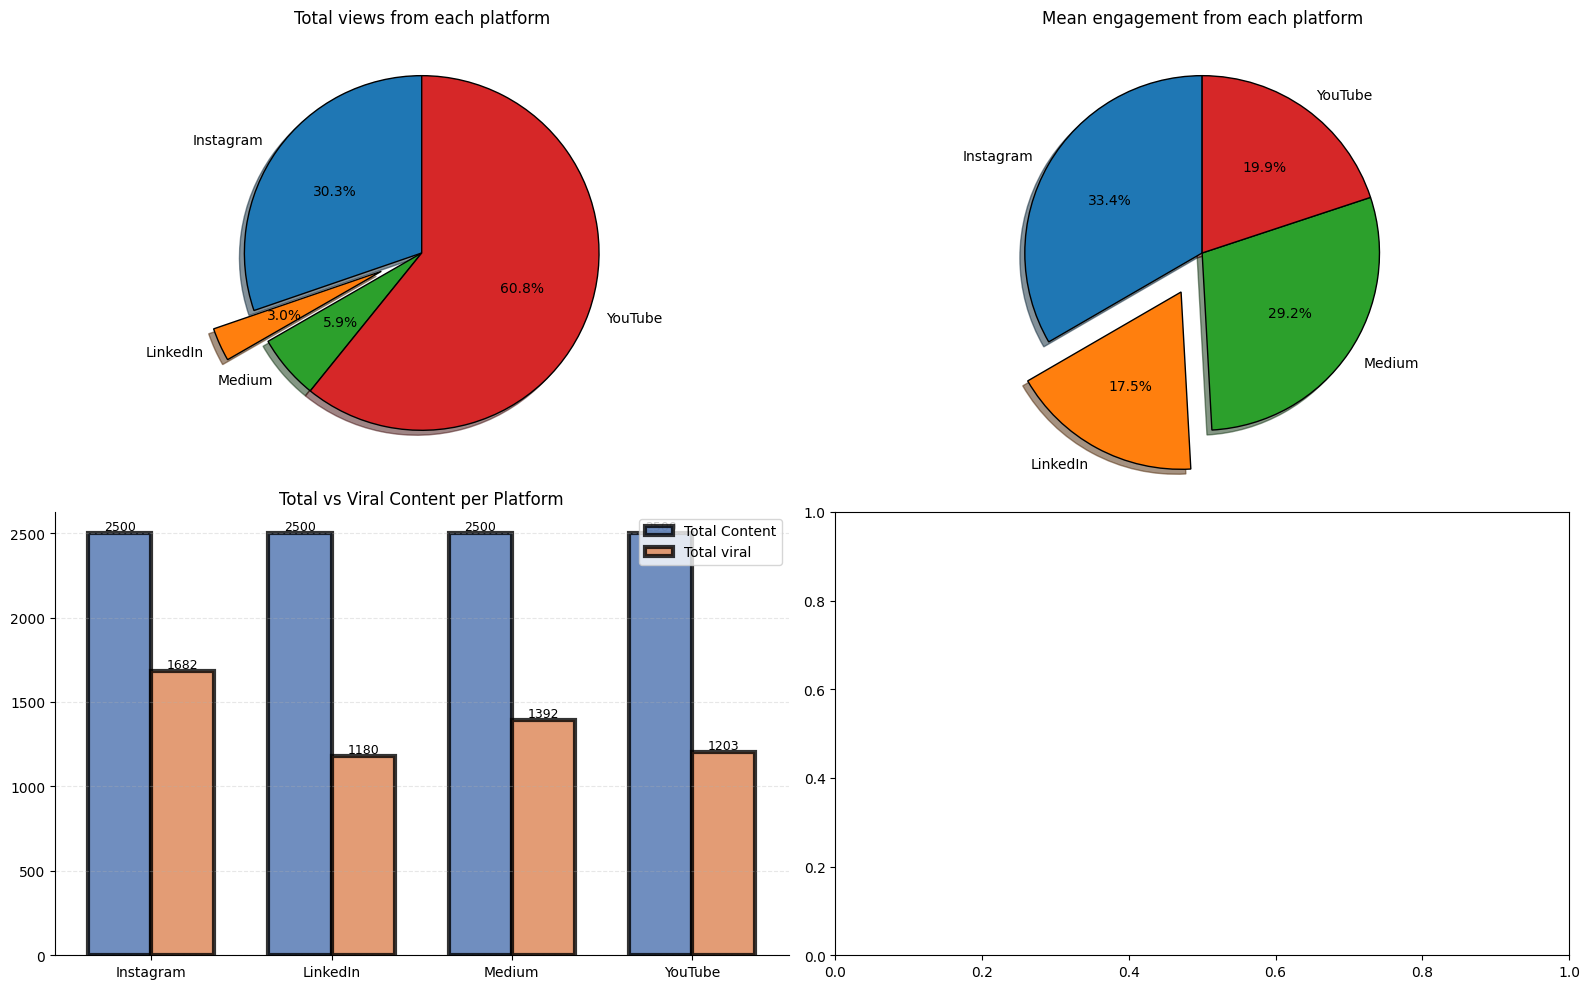

In [17]:
fig, axes = plt.subplots(2,2,figsize=(16,10))

explode_total = [
    0.25 if label == 'LinkedIn' else 0
    for label in total_views.index
]

explode_mean = [
    0.25 if label == 'LinkedIn' else 0
    for label in mean_engagement.index
]

axes[0,0].pie(total_views,
            labels=total_views.index, 
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            wedgeprops = {'edgecolor' : 'black'},
            explode=explode_total)
axes[0,0].set_title('Total views from each platform')

axes[0,1].pie(mean_engagement,
            labels=mean_engagement.index, 
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            wedgeprops = {'edgecolor' : 'black'},
            explode=explode_mean)
axes[0,1].set_title('Mean engagement from each platform')

color_total = '#4C72B0'   
color_viral = '#DD8452'   


comparison = pd.DataFrame({
    'total': total_content,
    'viral': viral_content
}).fillna(0)

x = np.arange(len(comparison.index))  # posisi dasar
width = 0.35  # lebar bar

axes[1,0].bar(x - width/2, 
            comparison['total'],
            width,
            color=color_total, 
            edgecolor='black',
            linewidth=3,
             alpha=0.8,
             label='Total Content')

axes[1,0].bar(x + width/2, 
            comparison['viral'],
            width,
            color=color_viral, 
            edgecolor='black',
            linewidth=3,
             alpha=0.8,
             label='Total viral')

# Tambahkan value untuk total
for i, v in enumerate(comparison['total']):
    axes[1,0].text(
        x[i] - width/2,
        v,
        str(int(v)),
        ha='center',
        va='bottom',
        fontsize=9
    )

# Tambahkan value untuk viral
for i, v in enumerate(comparison['viral']):
    axes[1,0].text(
        x[i] + width/2,
        v,
        str(int(v)),
        ha='center',
        va='bottom',
        fontsize=9
    )

axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)


axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(comparison.index)

axes[1,0].set_title('Total vs Viral Content per Platform')
axes[1,0].grid(axis='y', linestyle='--', alpha=0.3)
axes[1,0].legend()

plt.tight_layout()

In [18]:
viral_topic = df.groupby('topic')['is_viral'].sum()
viral_topic
total_topic = df['topic'].value_counts()
total_topic

topic
Lifestyle        1043
Travel           1030
Food             1030
Fashion          1025
Health           1021
Sports           1008
Technology        996
Entertainment     987
Education         956
Business          904
Name: count, dtype: int64

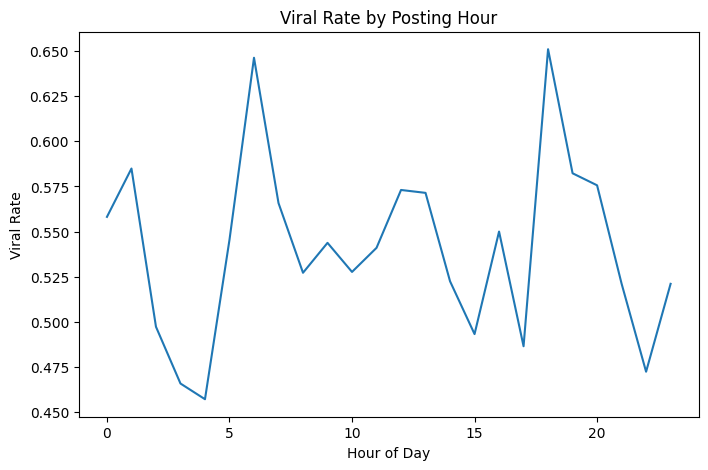

In [19]:
df['post_datetime'] = pd.to_datetime(df['post_datetime'])
df['hour'] = df['post_datetime'].dt.hour
hour_analysis = df.groupby('hour').agg(
    total_content=('is_viral', 'count'),
    viral_content=('is_viral', 'sum')
)

hour_analysis['viral_rate'] = (
    hour_analysis['viral_content'] /
    hour_analysis['total_content']
)

hour_analysis['viral_rate'].plot(kind='line', figsize=(8,5))
plt.title('Viral Rate by Posting Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Viral Rate')
plt.show()


In [23]:
platform_summary = df.groupby('platform')[['views','likes','comments','shares']].sum()
platform_summary

,views,likes,comments,shares
platform,,,,
Instagram,641974187,62800527,24153547,9660680
LinkedIn,64533409,3313735,1274024,508871
Medium,124834876,10729289,4126155,1649697
YouTube,1290079109,75525196,29047670,11618349


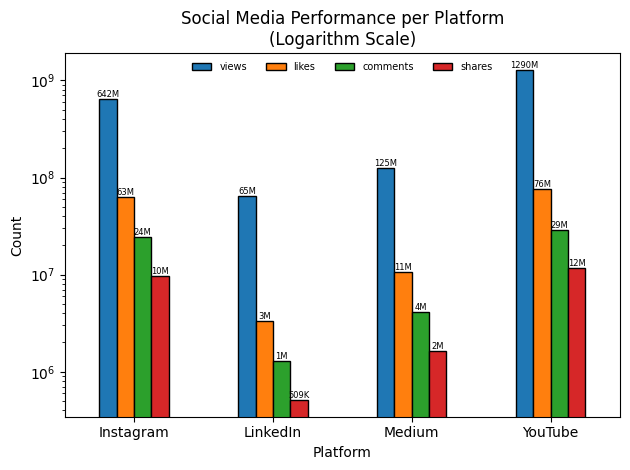

In [67]:
# Social Media Performance per Platform

bars = platform_summary.plot(kind='bar', label=platform_summary.index, edgecolor='black')
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Platform')
plt.title('Social Media Performance per Platform\n(Logarithm Scale)')
plt.legend(loc='upper center', fontsize=7, ncol=4,frameon=False)
plt.xticks(rotation=0)
plt.tight_layout()

# Ad value label on bars
def format_number(x):
    if x >= 1_000_000:
        return f"{x/1_000_000:.0f}M"
    elif x >= 1_000:
        return f"{x/1_000:.0f}K"
    else:
        return f"{x:.0f}"
# for container in bars.containers:
#     labels = [format_number(v) for v in container.datavalues]
#     bars.bar_label(container, labels=labels, padding=3, fontsize=6)
# OR
ax = plt.gca()

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2  

        ax.text(
            x,
            height,                    
            format_number(height),      # pakai formatter 
            ha='center',                # center horizontal
            va='bottom',                # di atas batang
            fontsize=6
        )

import os 

folder = 'img'
os.makedirs(folder, exist_ok=True)
filepath = os.path.join(folder, 'Social_Media_Performance_per_Platform.png')
plt.savefig(filepath, dpi=600, bbox_inches='tight', facecolor='white')

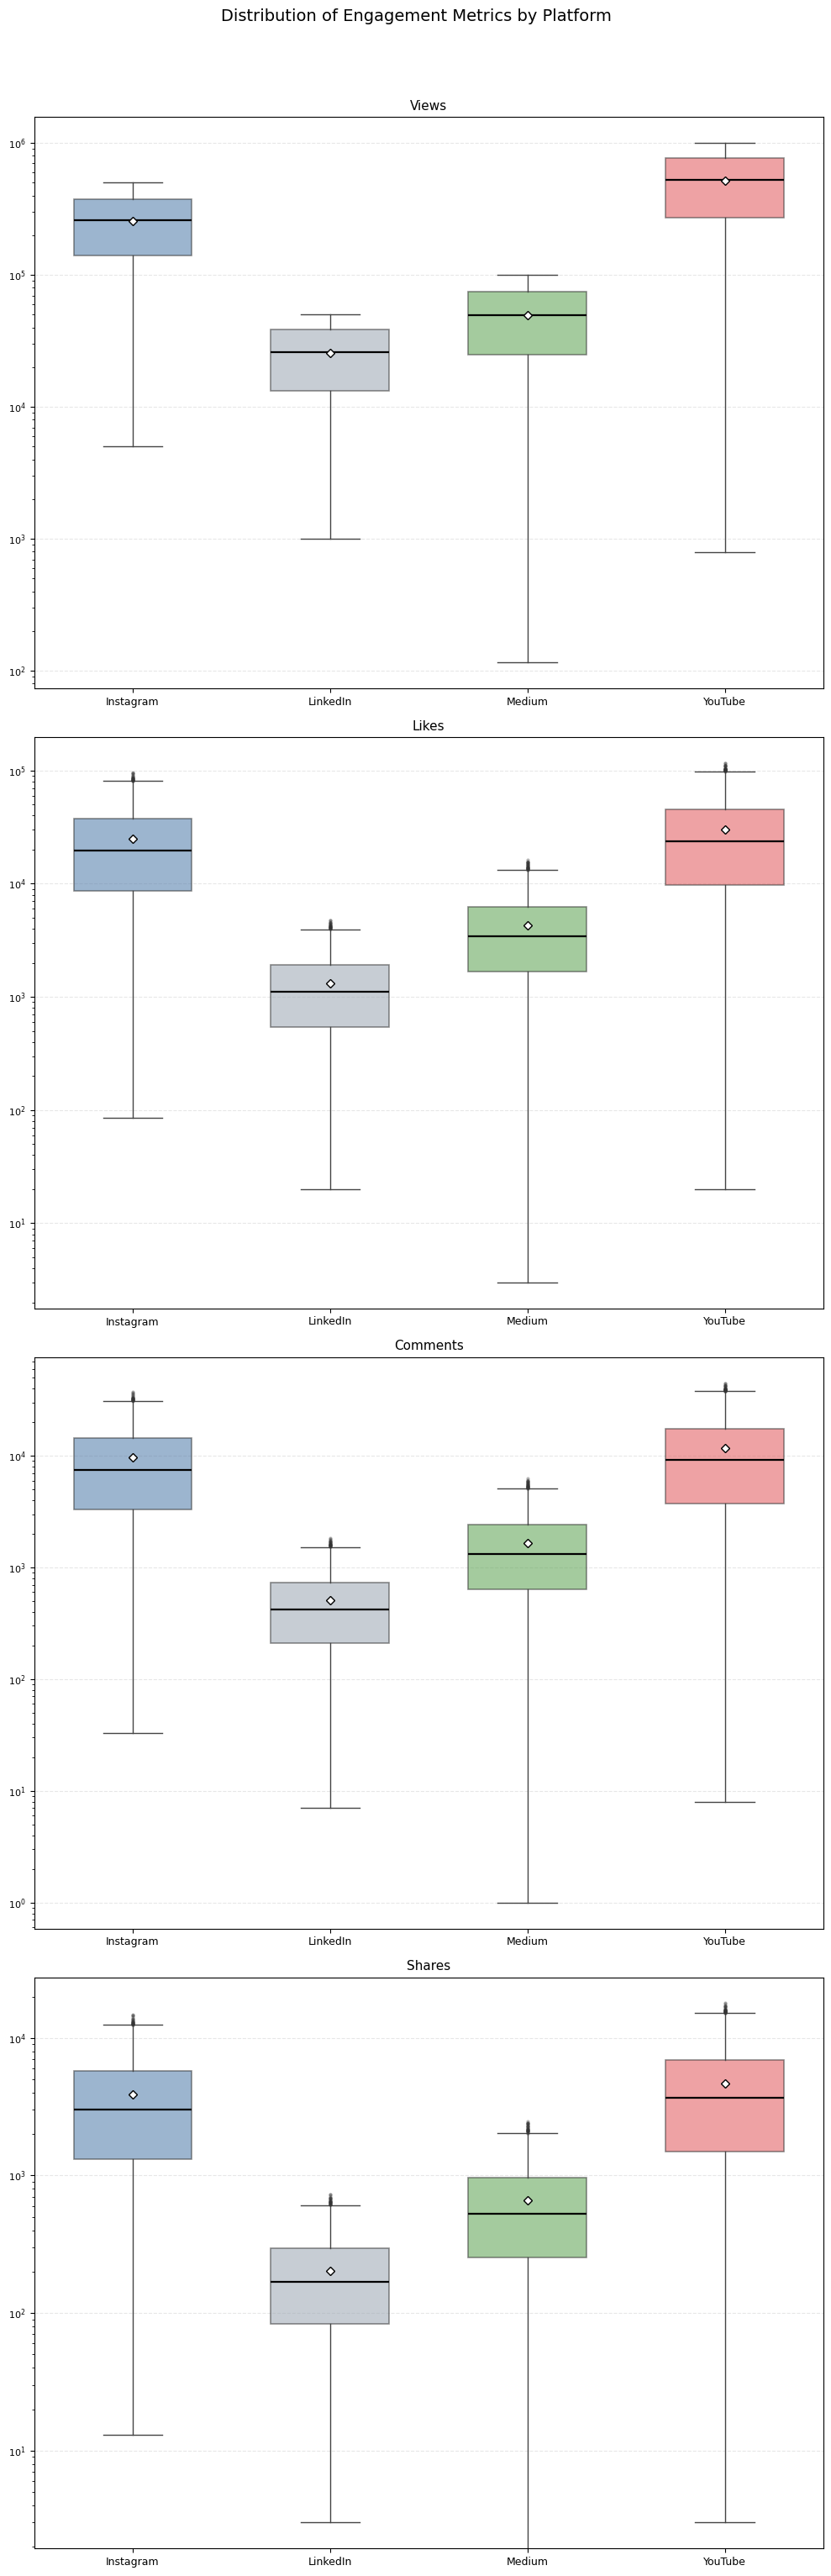

In [88]:
metrics = ['views', 'likes', 'comments', 'shares']
platforms = ['Instagram', 'LinkedIn', 'Medium', 'YouTube']

# warna tetap per platform
colors = {
    'Instagram': '#4C78A8',
    'LinkedIn' : '#9AA5B1',
    'Medium'   : '#59A14F',
    'YouTube'  : '#E15759'
}

fig, axes = plt.subplots(4,1, figsize=(10,30))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]

    data = [df[df['platform'] == p][metric] for p in platforms]

    bp = ax.boxplot(
        data,
        patch_artist=True,
        showmeans=True,
        widths=0.6,
        medianprops=dict(color='black', linewidth=1.6),
        meanprops=dict(marker='D', markerfacecolor='white',
                       markeredgecolor='black', markersize=5),
        whiskerprops=dict(color='#444'),
        capprops=dict(color='#444'),
        flierprops=dict(marker='o', markersize=3,
                        markerfacecolor='#333', alpha=0.35,
                        markeredgecolor='none')
    )

    # kasih warna per platform
    for patch, p in zip(bp['boxes'], platforms):
        patch.set_facecolor(colors[p])
        patch.set_alpha(0.55)
        patch.set_edgecolor('#333')
        patch.set_linewidth(1.2) 
        
    ax.set_yscale('log')

    ax.set_title(metric.capitalize(), fontsize=11, pad=6)
    ax.set_xticklabels(platforms, fontsize=9)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.3)


fig.suptitle('Distribution of Engagement Metrics by Platform', fontsize=14, y=1.02)
plt.tight_layout()

import os 

folder = 'img'
os.makedirs(folder, exist_ok=True)
filepath = os.path.join(folder, 'Distribution of Engagement Metrics by Platform.png')
plt.savefig(filepath, dpi=600, bbox_inches='tight', facecolor='white')


## OR

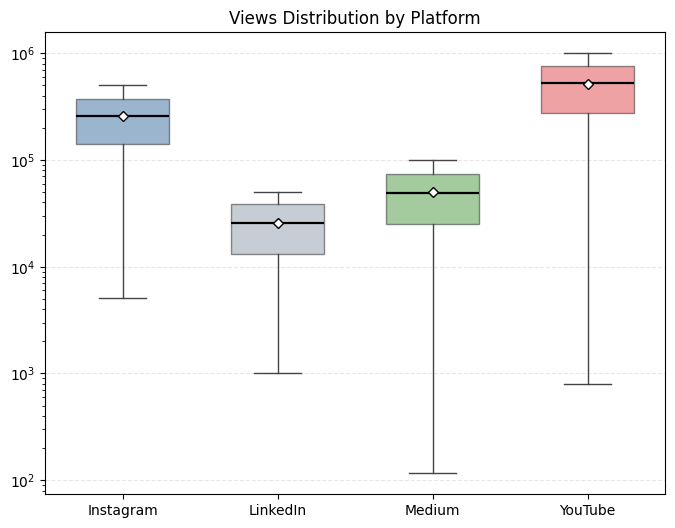

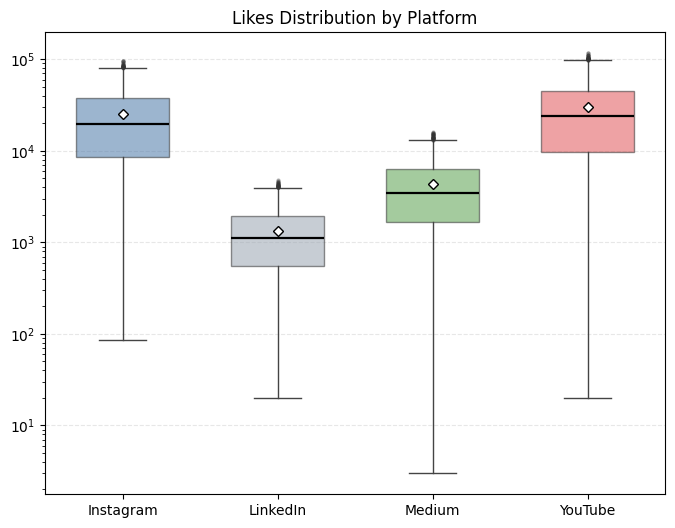

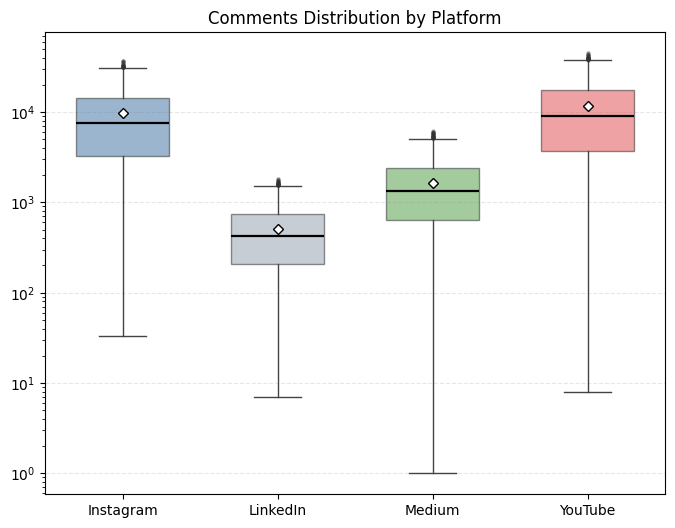

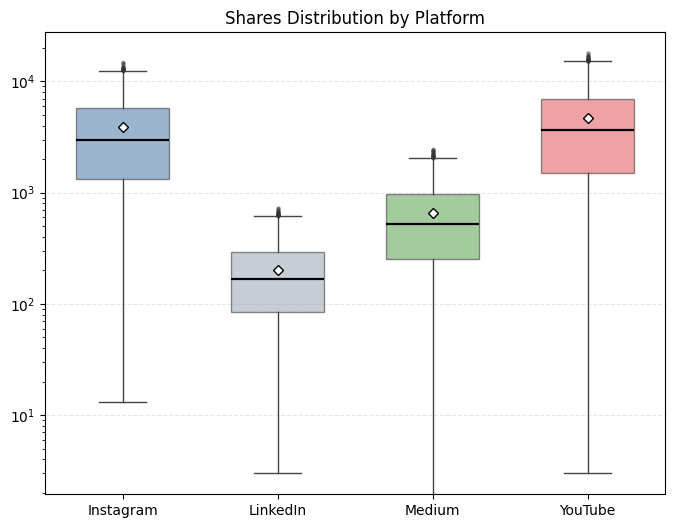

In [90]:
import matplotlib.pyplot as plt
import os

metrics = ['views', 'likes', 'comments', 'shares']
platforms = ['Instagram', 'LinkedIn', 'Medium', 'YouTube']

colors = {
    'Instagram': '#4C78A8',
    'LinkedIn' : '#9AA5B1',
    'Medium'   : '#59A14F',
    'YouTube'  : '#E15759'
}

folder = 'img'
os.makedirs(folder, exist_ok=True)

for metric in metrics:

    # 🔥 figure BARU tiap metric
    fig, ax = plt.subplots(figsize=(8,6))

    data = [df[df['platform'] == p][metric] for p in platforms]

    bp = ax.boxplot(
        data,
        patch_artist=True,
        showmeans=True,
        widths=0.6,
        medianprops=dict(color='black', linewidth=1.6),
        meanprops=dict(marker='D', markerfacecolor='white',
                       markeredgecolor='black', markersize=5),
        whiskerprops=dict(color='#444'),
        capprops=dict(color='#444'),
        flierprops=dict(marker='o', markersize=3,
                        markerfacecolor='#333', alpha=0.35,
                        markeredgecolor='none')
    )

    for patch, p in zip(bp['boxes'], platforms):
        patch.set_facecolor(colors[p])
        patch.set_alpha(0.55)
        patch.set_edgecolor('#333')

    
    ax.set_yscale('log')

    ax.set_title(f'{metric.capitalize()} Distribution by Platform')
    ax.set_xticklabels(platforms)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

    filepath = os.path.join(folder, f'{metric}_distribution.png')
    fig.savefig(filepath, dpi=600, bbox_inches='tight', facecolor='white')

    plt.show()      # tampil di notebook
    plt.close(fig)  # tutup supaya next loop fresh
